# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

**Sumber dataset diambil dari platform Kaggle**
* Link : https://www.kaggle.com/datasets/kaushiksuresh147/adidas-vs-nike

* Jumlah Baris : 3268

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import os
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
dataset = pd.read_csv('/content/Adidas Vs Nike.csv')
# Tampilkan beberapa baris pertama
dataset.head(11)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,4799,1920,60,Adidas CORE / NEO,Refine your interval training in these women's...,1.0,45,2020-04-13T15:06:15
6,Women's adidas Sport Inspired Duramo Lite 2.0 ...,CG4051,4799,2399,50,Adidas CORE / NEO,Refine your interval training in these women's...,4.4,2,2020-04-13T15:06:15
7,Women's adidas Swim Puka Slippers,CM0080,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.8,7,2020-04-13T15:06:15
8,WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES,B75990,5599,2799,50,Adidas CORE / NEO,These women's neutral running shoes will get y...,4.5,16,2020-04-13T15:06:15
9,Men's adidas Originals Forest Grove Shoes,EE5761,6599,3959,40,Adidas ORIGINALS,The Forest Grove brings back the look of the a...,4.0,39,2020-04-13T15:06:15


In [4]:
datasetor = dataset.copy()
print(type(datasetor))
datasetor.head(10)


<class 'pandas.core.frame.DataFrame'>


,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,4799,1920,60,Adidas CORE / NEO,Refine your interval training in these women's...,1.0,45,2020-04-13T15:06:15
6,Women's adidas Sport Inspired Duramo Lite 2.0 ...,CG4051,4799,2399,50,Adidas CORE / NEO,Refine your interval training in these women's...,4.4,2,2020-04-13T15:06:15
7,Women's adidas Swim Puka Slippers,CM0080,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.8,7,2020-04-13T15:06:15
8,WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES,B75990,5599,2799,50,Adidas CORE / NEO,These women's neutral running shoes will get y...,4.5,16,2020-04-13T15:06:15
9,Men's adidas Originals Forest Grove Shoes,EE5761,6599,3959,40,Adidas ORIGINALS,The Forest Grove brings back the look of the a...,4.0,39,2020-04-13T15:06:15


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**1. JENIS DATA YANG DIGUNAKAN**

1.   DATA KATEGORIKAL : Brand.
2.   DATA NUMERIC : Listing Price, Sale Price, Discount, Rating, Reviews.

Dengan jumlah masing-masing 3268 data.


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
 9   Last Visited   3268 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB


In [6]:
dataset.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


**2. PENGECEKAN DATA YANG HILANG**

In [7]:
dataset.isnull().sum()

,0
Product Name,0
Product ID,0
Listing Price,0
Sale Price,0
Discount,0
Brand,0
Description,3
Rating,0
Reviews,0
Last Visited,0


**3. ANALISIS DISTRIBUSI DAN KORELASI**

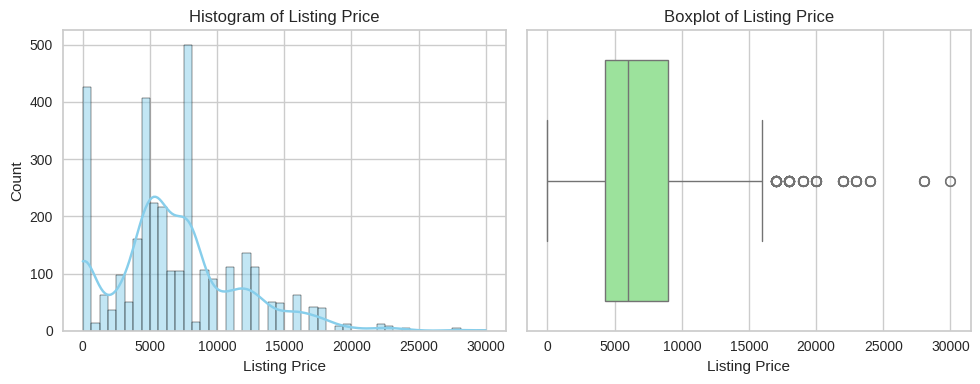

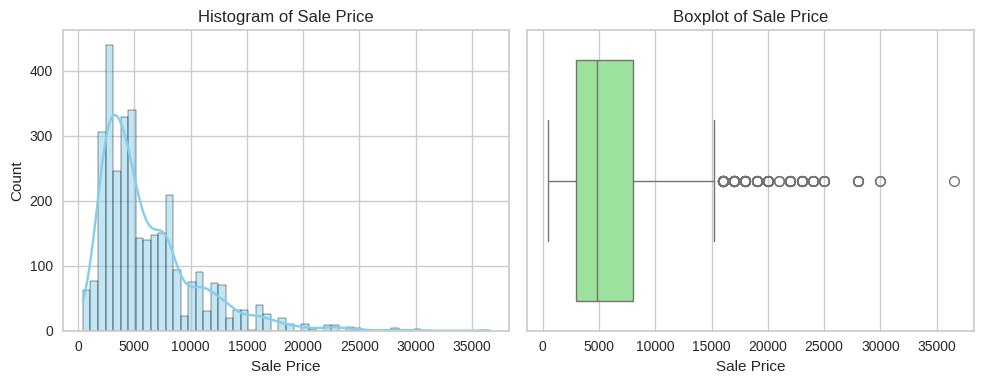

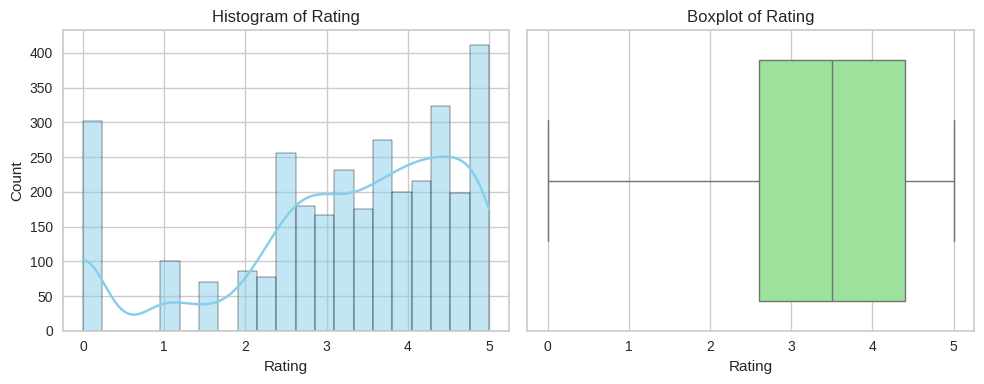

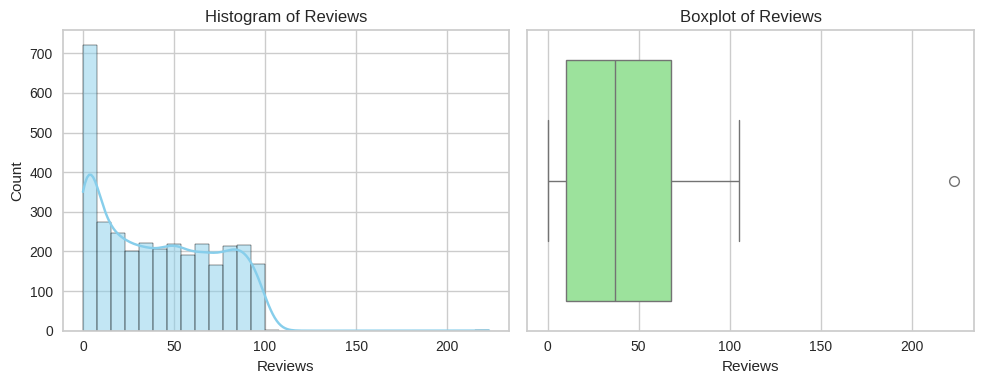

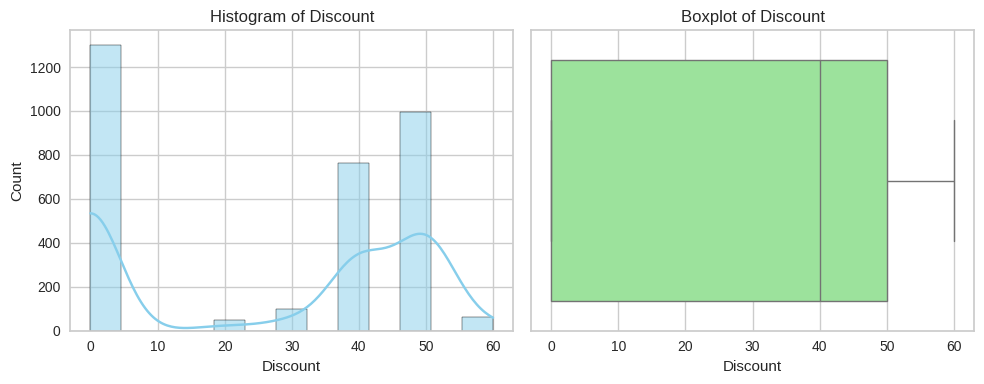


Matriks Korelasi:
                Listing Price  Sale Price    Rating   Reviews  Discount
Listing Price       1.000000    0.312255  0.099764  0.161296  0.125999
Sale Price          0.312255    1.000000 -0.042172 -0.240728 -0.594659
Rating              0.099764   -0.042172  1.000000  0.140577  0.081510
Reviews             0.161296   -0.240728  0.140577  1.000000  0.313591
Discount            0.125999   -0.594659  0.081510  0.313591  1.000000


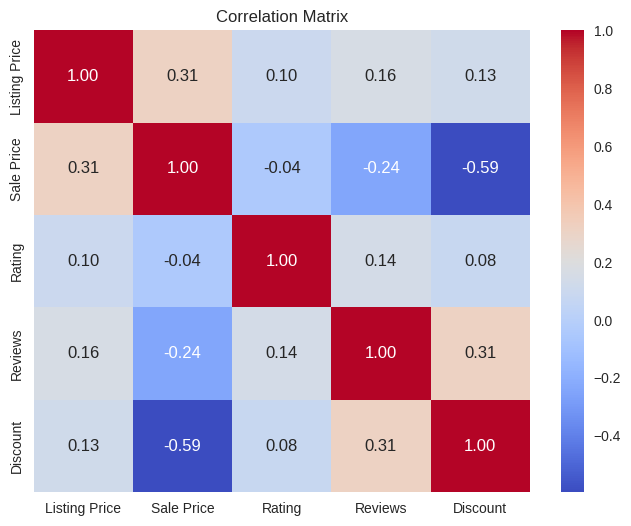

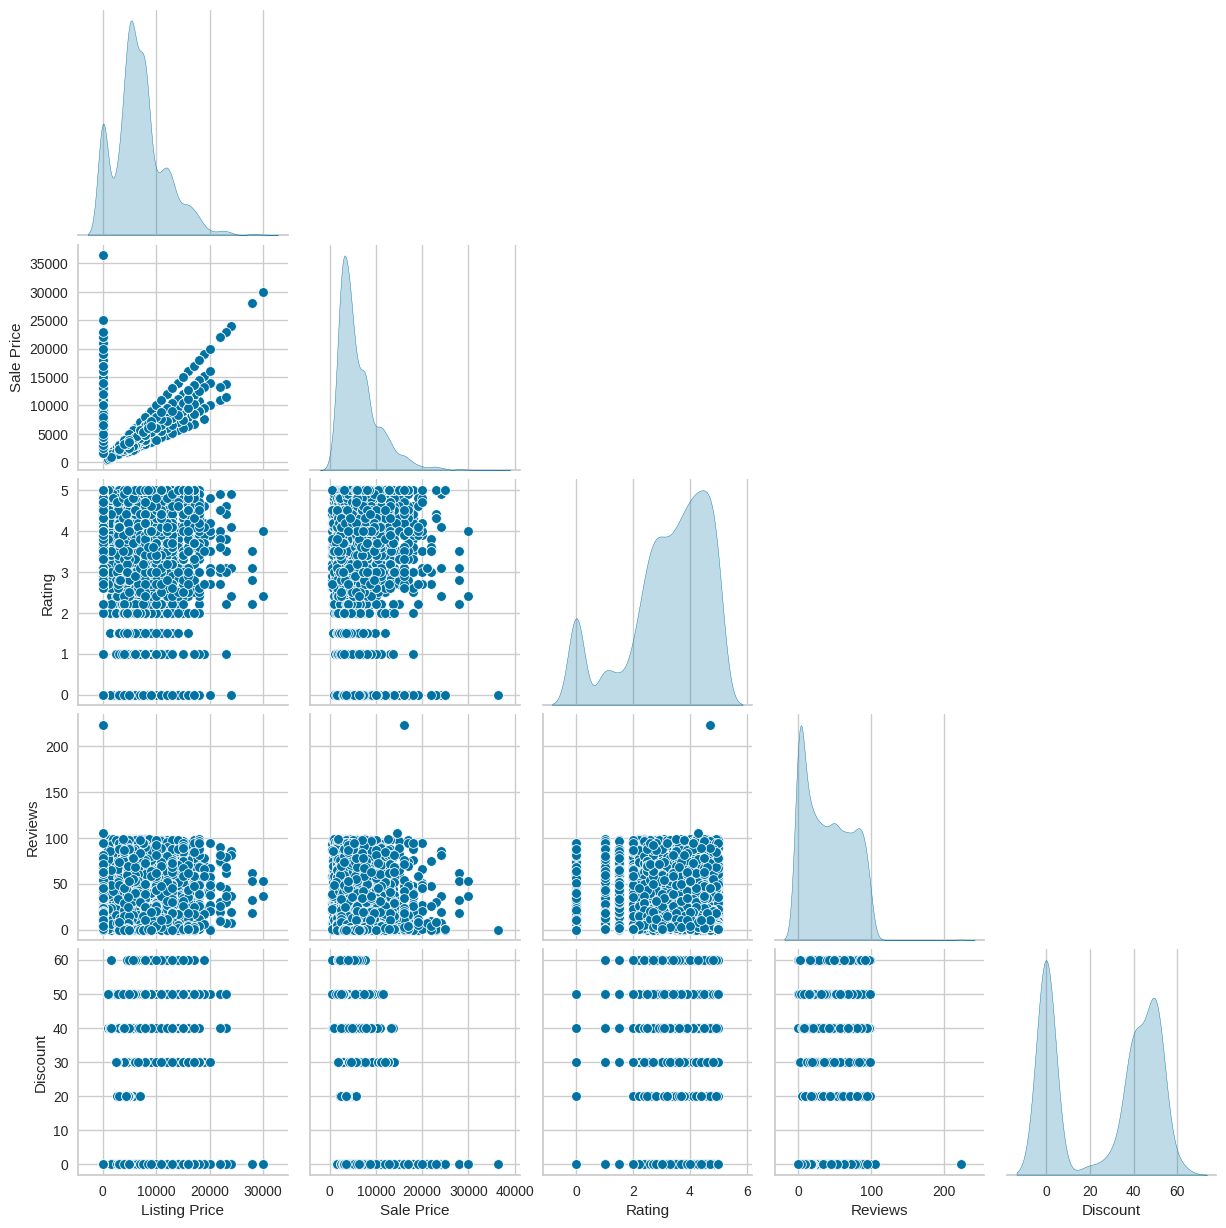

In [8]:
# Visualisasi distribusi
numerical_columns = ["Listing Price", "Sale Price", "Rating", "Reviews", "Discount"]
for col in numerical_columns:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(dataset[col], kde=True, color='skyblue')
    plt.title(f"Histogram of {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataset[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

# Analisis Korelasi
# Matriks korelasi
correlation_matrix = dataset[numerical_columns].corr()
print("\nMatriks Korelasi:\n", correlation_matrix)

# Visualisasi matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Scatter plot untuk hubungan antar variabel
sns.pairplot(dataset[numerical_columns], diag_kind="kde", corner=True)
plt.show()


In [9]:
# Menampilkan nama kolom yang ada dalam dataset
print(dataset.columns)

Index(['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Discount',
       'Brand', 'Description', 'Rating', 'Reviews', 'Last Visited'],
      dtype='object')


**4. VISUALISASI DATA**

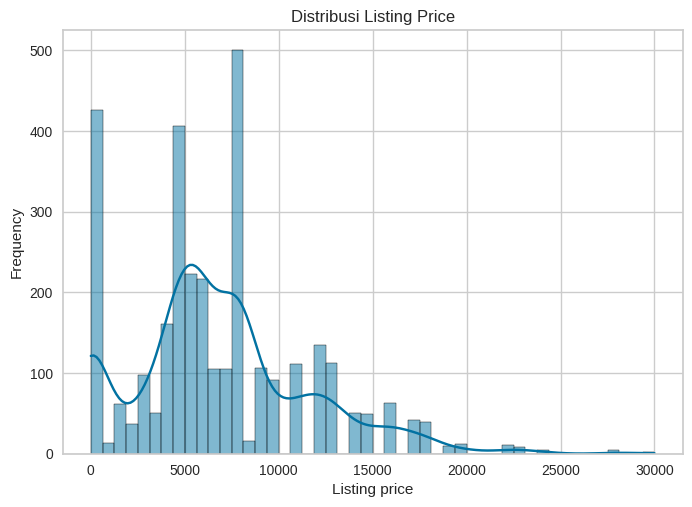

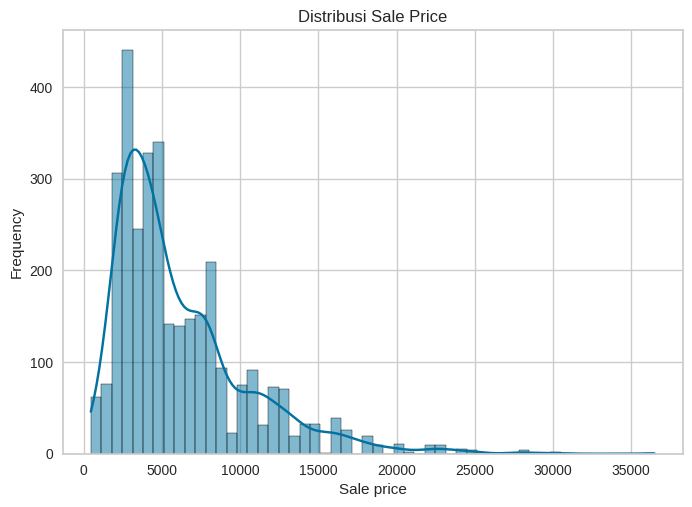

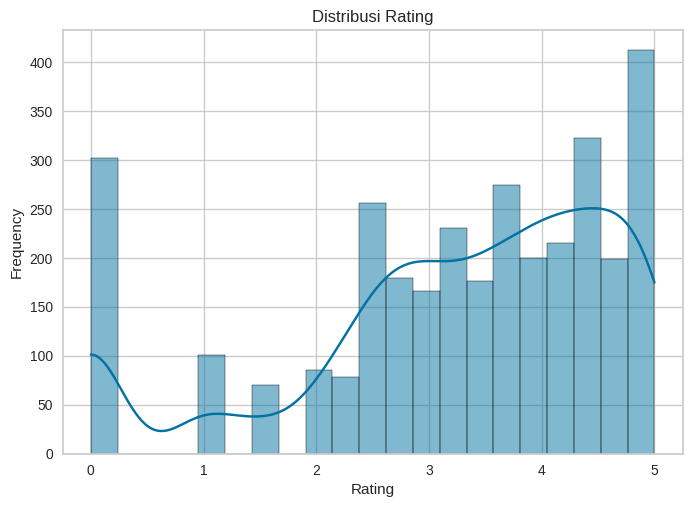

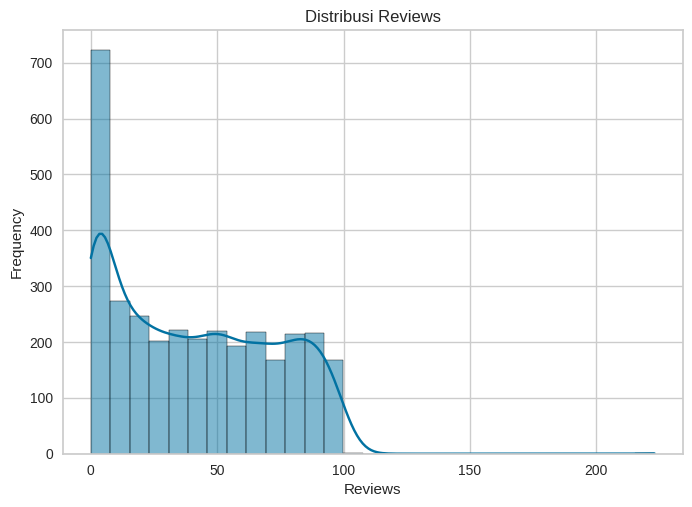

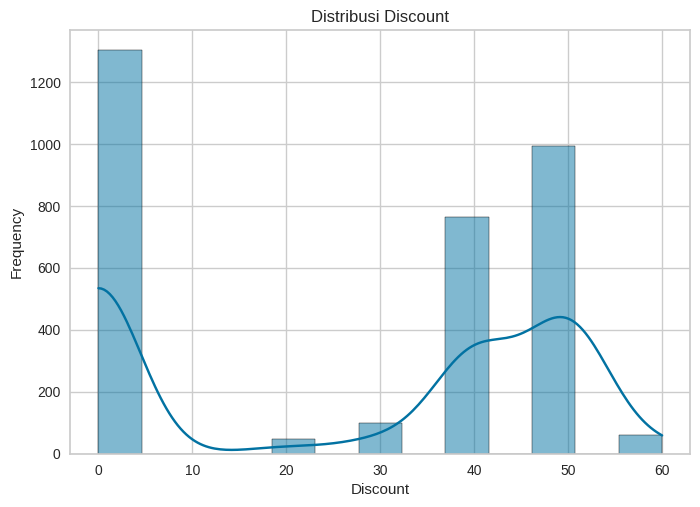

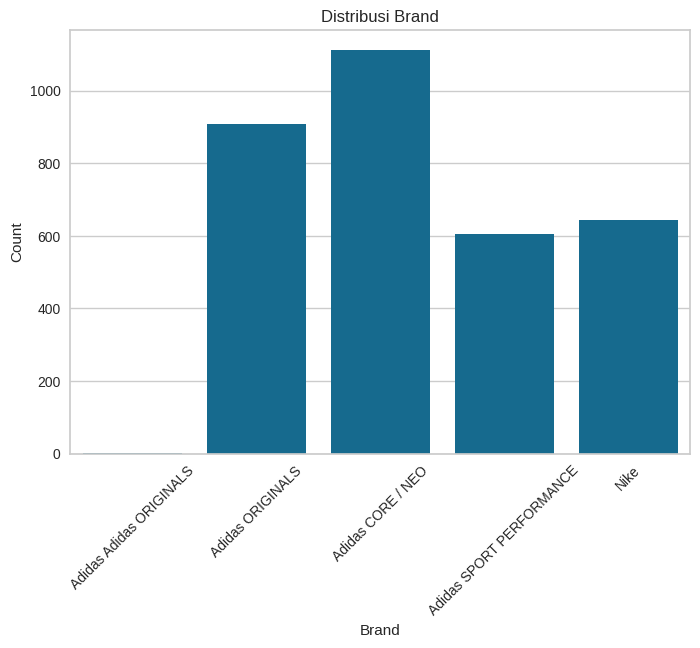

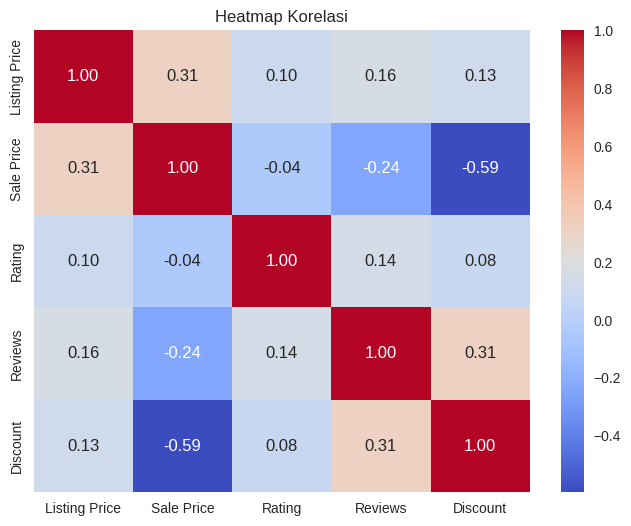

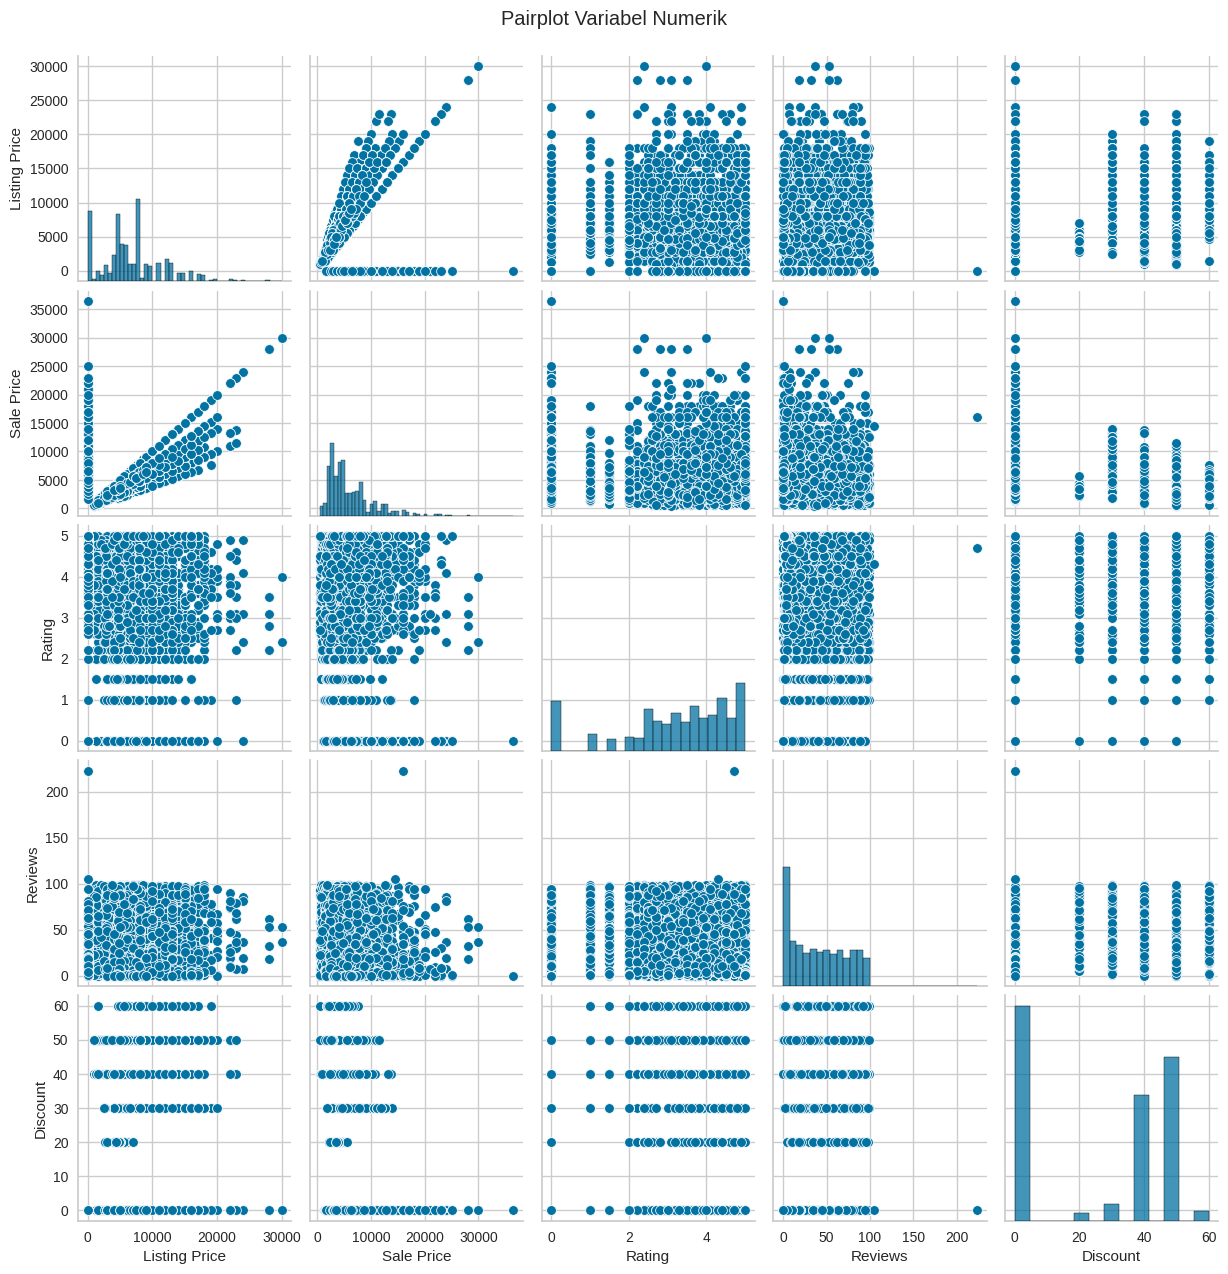

In [10]:
for col in numerical_columns:
    sns.histplot(dataset[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.show()

# 2. Diagram Batang untuk Variabel Kategorikal
sns.countplot(data=dataset, x='Brand')
plt.title('Distribusi Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 3. Heatmap Korelasi
plt.figure(figsize=(8, 6))
correlation_matrix = dataset[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

# 4. Pairplot untuk Korelasi Variabel Numerik
sns.pairplot(dataset[numerical_columns])
plt.suptitle('Pairplot Variabel Numerik', y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

**1. SETELAH PENGECEKAN DATA KOSONG, DINYATAKAN BAHWA DAT LENGKAP DAN TIDAK ADA YANG MISSING VALUE.**

**2. MENGHAPUS DATA DUPLICATE**

In [11]:
# Menghitung jumlah baris duplikat berdasarkan semua kolom
jumlah_duplikat = dataset.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

dataset = dataset.drop_duplicates()
# Menampilkan dataset setelah penghapusan duplikat
print(f"Dataset setelah penghapusan duplikat: {len(dataset)} baris")
dataset.head()

Jumlah baris duplikat: 0
Dataset setelah penghapusan duplikat: 3268 baris


,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


**3. ENCODING DATA KATEGORIKAL**

In [12]:
le = LabelEncoder()
dataset["Brand_Encoded"] = le.fit_transform(dataset["Brand"])
dataset.head(3268)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,Brand_Encoded
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,0
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,2
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,1
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,1
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,2
...,...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01,4
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13T15:41:03,4
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13T15:41:07,4
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13T15:41:19,4


**4. PENDETEKSIAN DAN PENANGAN OUTLIER**

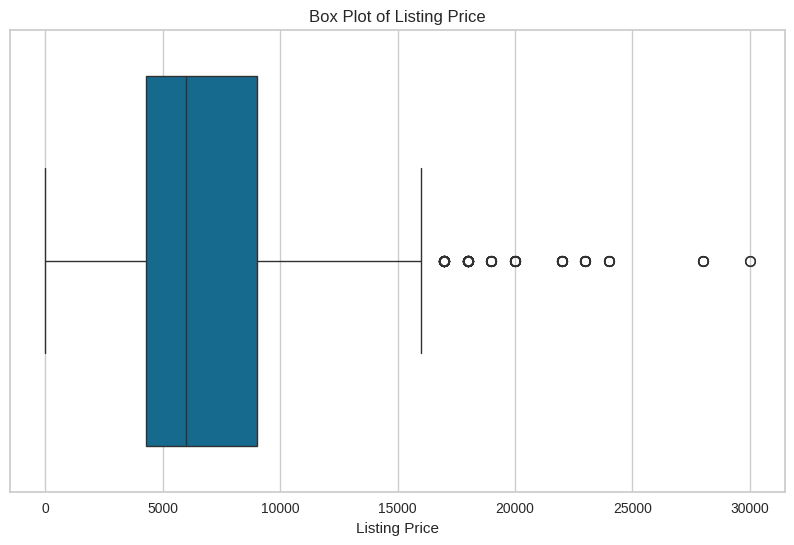

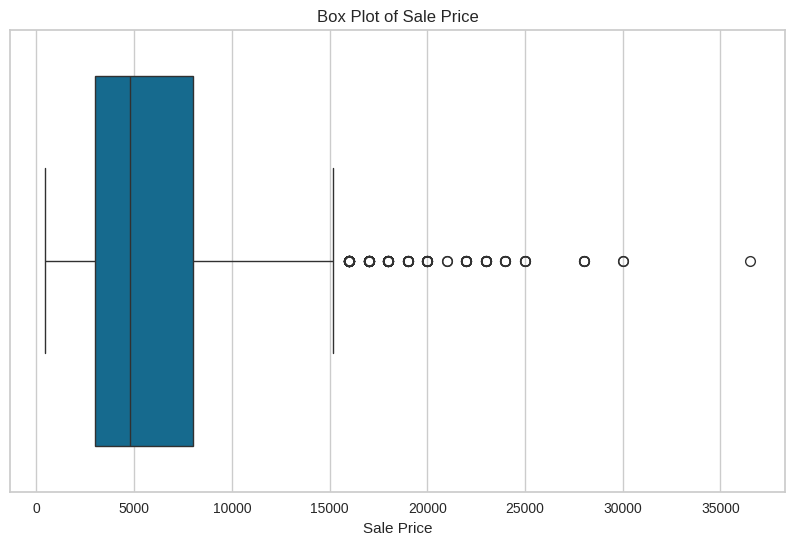

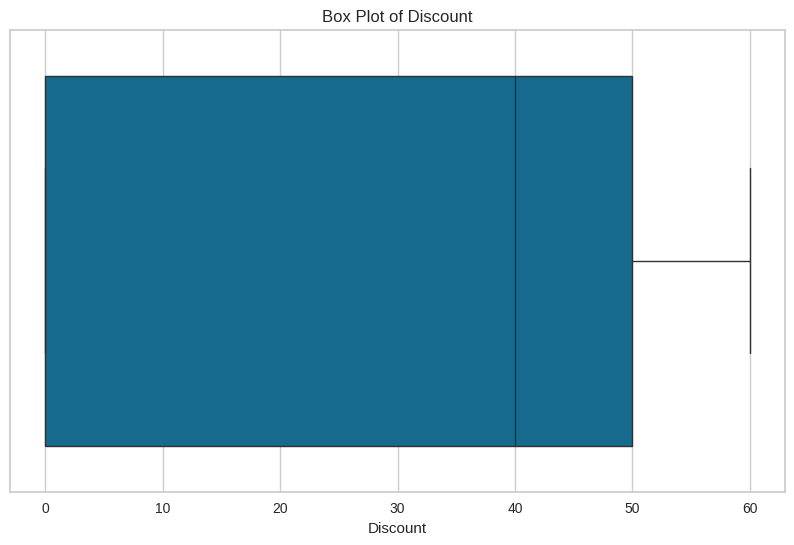

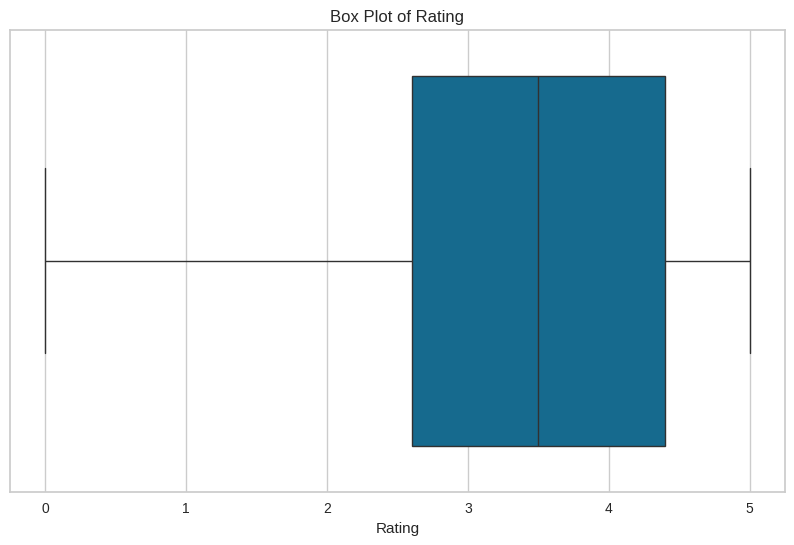

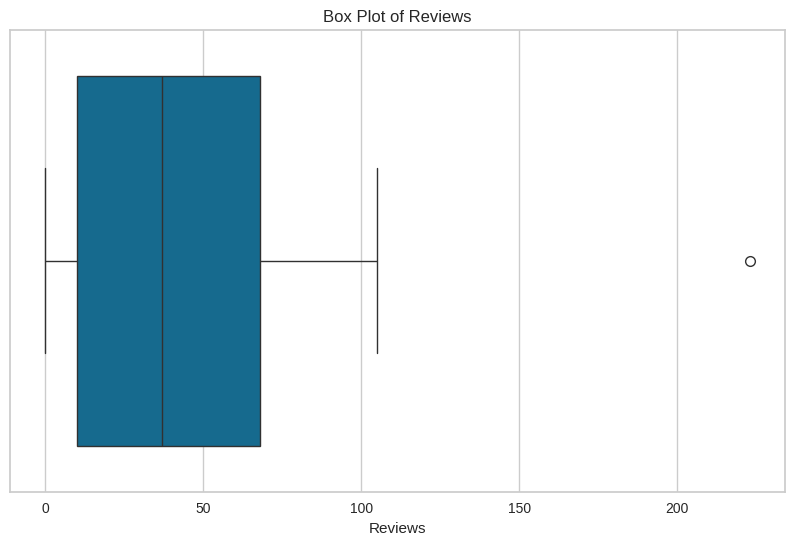

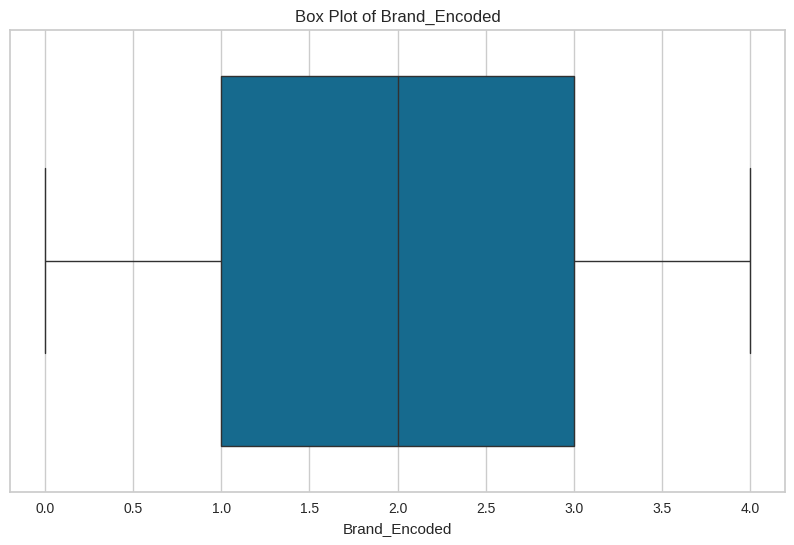

In [13]:
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=dataset[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()


Data tanpa outlier:
                                           Product Name  Product ID  \
0     Women's adidas Originals NMD_Racer Primeknit S...      AH2430   
1                  Women's adidas Originals Sleek Shoes      G27341   
2                     Women's adidas Swim Puka Slippers      CM0081   
3      Women's adidas Sport Inspired Questar Ride Shoes      B44832   
4              Women's adidas Originals Taekwondo Shoes      D98205   
...                                                 ...         ...   
3262                              Nike React Metcon AMP  CT9155-063   
3263                                 Air Jordan 8 Retro  CI1236-100   
3264                         Nike Phantom Venom Club IC  AO0578-717   
3265               Nike Mercurial Superfly 7 Academy TF  AT7978-414   
3267                                     Nike P-6000 SE  CJ9585-600   

      Listing Price  Sale Price  Discount                    Brand  \
0             14999        7499        50  Adidas Adidas 

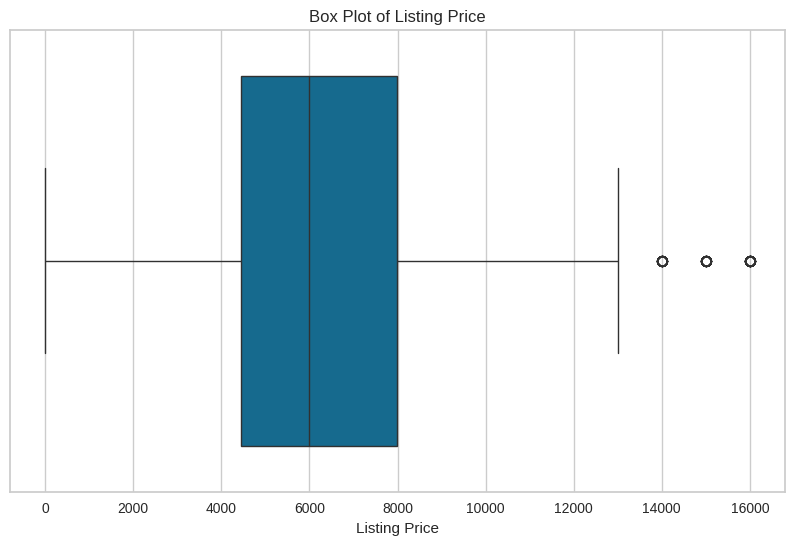

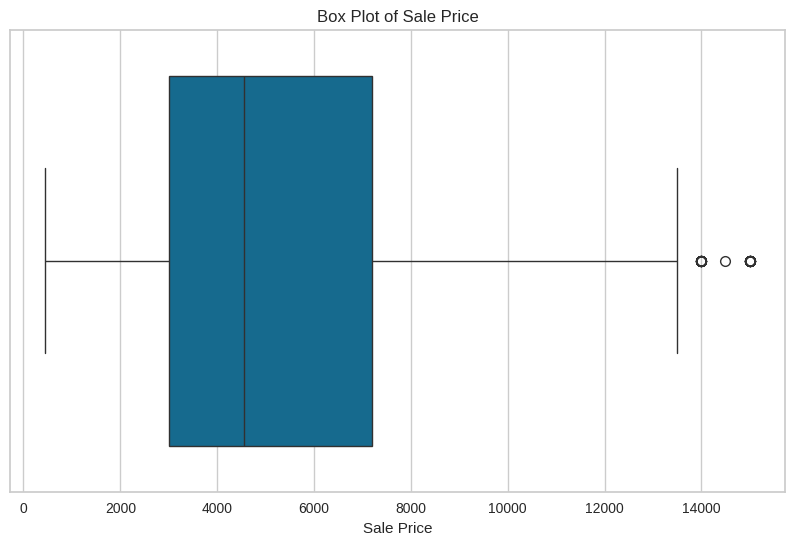

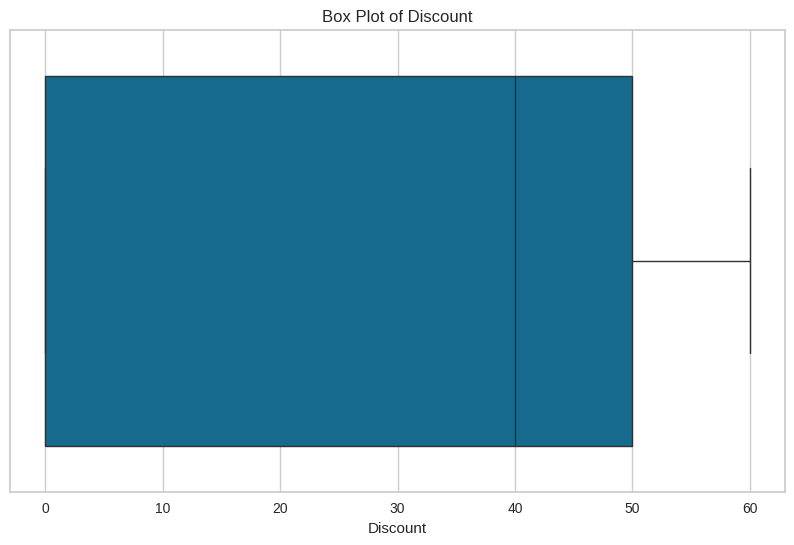

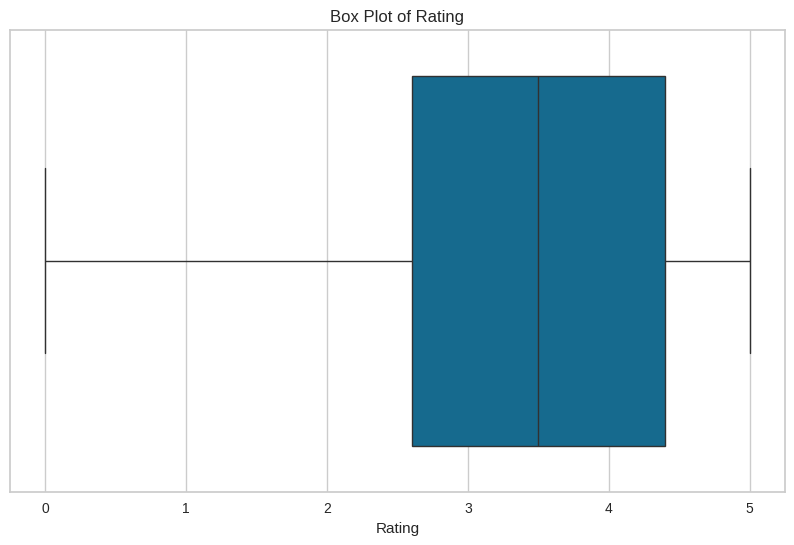

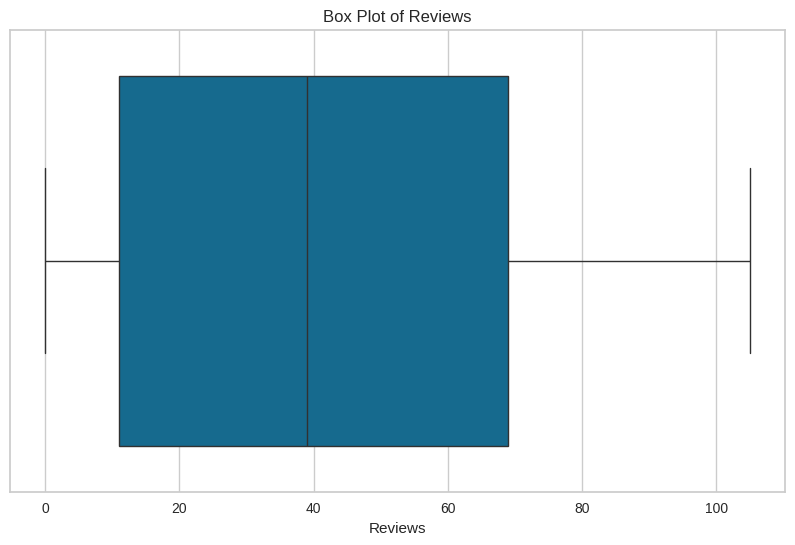

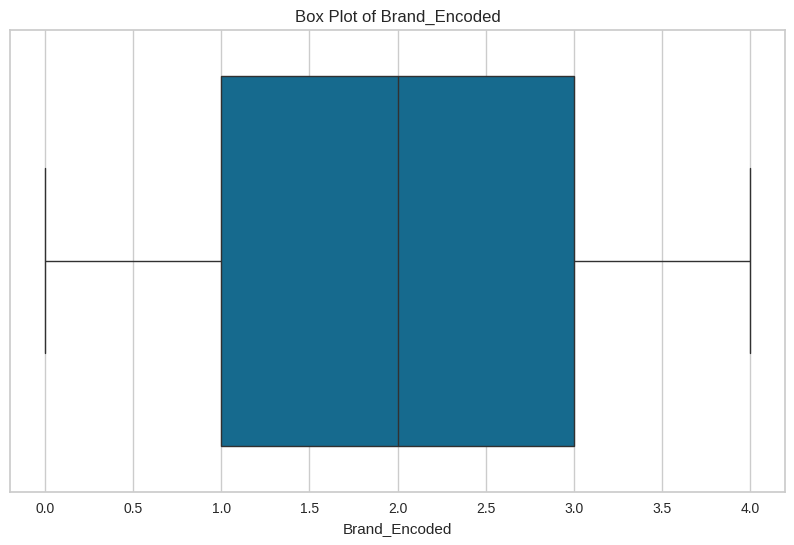

In [14]:
# Pilih hanya kolom numerik dari dataset
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Hitung IQR hanya untuk kolom numerik
Q1 = dataset[numerical_cols].quantile(0.25)
Q3 = dataset[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((dataset[numerical_cols] < (Q1 - 1.5 * IQR)) | (dataset[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
fixsdataset = dataset[condition]

print("Data tanpa outlier:")
print(fixsdataset)

for feature in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=fixsdataset[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

**5. NORMALISASI DATA**

In [15]:
scaler_ListingPrice = MinMaxScaler()
scaler_SalePrice = MinMaxScaler()
scaler_Rating = MinMaxScaler()
scaler_Reviews = MinMaxScaler()
scaler_Discount = MinMaxScaler()

fixsdataset["Listing_PriceNorm"] = scaler_ListingPrice.fit_transform(fixsdataset[["Listing Price"]])
fixsdataset["Sale_PriceNorm"] = scaler_SalePrice.fit_transform(fixsdataset[["Sale Price"]])
fixsdataset["RatingNorm"] = scaler_Rating.fit_transform(fixsdataset[["Rating"]])
fixsdataset["ReviewsNorm"] = scaler_Reviews.fit_transform(fixsdataset[["Reviews"]])
fixsdataset["DiscountNorm"] = scaler_Discount.fit_transform(fixsdataset[["Discount"]])


<ipython-input-15-fab2a4aac7ad>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixsdataset["Listing_PriceNorm"] = scaler_ListingPrice.fit_transform(fixsdataset[["Listing Price"]])
<ipython-input-15-fab2a4aac7ad>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixsdataset["Sale_PriceNorm"] = scaler_SalePrice.fit_transform(fixsdataset[["Sale Price"]])
<ipython-input-15-fab2a4aac7ad>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [16]:
X= fixsdataset.iloc[:, [2,3,4,7,8,10,]]
X.head()

,Listing Price,Sale Price,Discount,Rating,Reviews,Brand_Encoded
0,14999,7499,50,4.8,41,0
1,7599,3799,50,3.3,24,2
2,999,599,40,2.6,37,1
3,6999,3499,50,4.1,35,1
4,7999,3999,50,3.5,72,2


In [17]:
from sklearn.cluster import KMeans
    # Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

identified_clusters = kmeans.fit_predict(X)
identified_clusters

data_with_clusters = fixsdataset.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters
    # Menampilkan rentang detail untuk tiap klaster
cluster_details = []
for cluster in data_with_clusters["Cluster"].unique():
    cluster_data = data_with_clusters[data_with_clusters["Cluster"] == cluster]
    cluster_info = {
        "Cluster": cluster,
        "Listing Price Min": cluster_data["Listing Price"].min(),
        "Listing Price Max": cluster_data["Listing Price"].max(),
        "Sale Price Min": cluster_data["Sale Price"].min(),
        "Sale Price Max": cluster_data["Sale Price"].max(),
        "Discount Min": cluster_data["Discount"].min(),
        "Discount Max": cluster_data["Discount"].max(),
        "Rating Min": cluster_data["Rating"].min(),
        "Rating Max": cluster_data["Rating"].max(),
        "Reviews Min": cluster_data["Reviews"].min(),
        "Reviews Max": cluster_data["Reviews"].max(),
        "Brand": cluster_data["Brand"].unique().tolist()
    }
    cluster_details.append(cluster_info)

# Menampilkan detail klaster
print("Detail Pembagian Klaster:")
for detail in cluster_details:
    print(f"Cluster {detail['Cluster']}:")
    print(f"  Listing Price: {detail['Listing Price Min']} - {detail['Listing Price Max']}")
    print(f"  Sale Price: {detail['Sale Price Min']} - {detail['Sale Price Max']}")
    print(f"  Discount: {detail['Discount Min']} - {detail['Discount Max']}")
    print(f"  Rating: {detail['Rating Min']} - {detail['Rating Max']}")
    print(f"  Reviews: {detail['Reviews Min']} - {detail['Reviews Max']}")
    print(f"  Brand: {', '.join(detail['Brand'])}")
    print()

Detail Pembagian Klaster:
Cluster 0:
  Listing Price: 7599 - 15999
  Sale Price: 4400 - 14999
  Discount: 0 - 60
  Rating: 0.0 - 5.0
  Reviews: 0 - 99
  Brand: Adidas Adidas ORIGINALS, Adidas ORIGINALS, Adidas SPORT PERFORMANCE, Adidas CORE / NEO, Nike

Cluster 1:
  Listing Price: 0 - 9999
  Sale Price: 449 - 6999
  Discount: 0 - 60
  Rating: 0.0 - 5.0
  Reviews: 0 - 99
  Brand: Adidas ORIGINALS, Adidas CORE / NEO, Adidas SPORT PERFORMANCE, Nike

Cluster 2:
  Listing Price: 0 - 0
  Sale Price: 4495 - 14995
  Discount: 0 - 0
  Rating: 0.0 - 5.0
  Reviews: 0 - 105
  Brand: Nike



## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

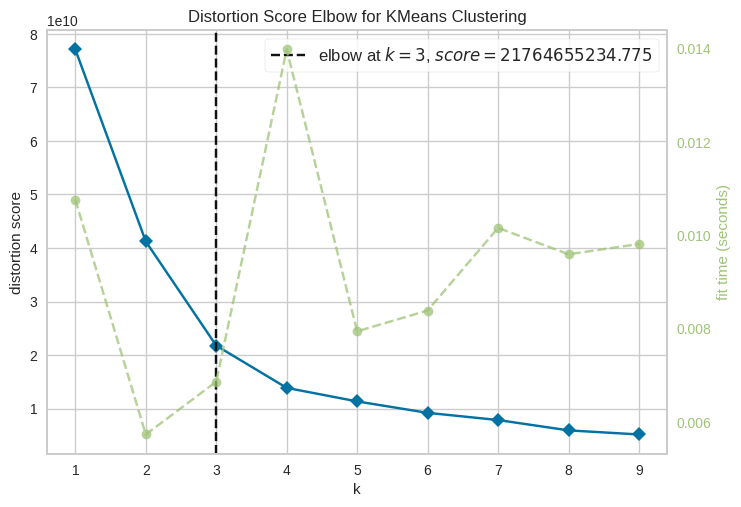

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)
visualizer.show()

In [19]:
# Hitung silhouette score
silhouette_vals = silhouette_score(X, identified_clusters)
# Simpan dalam DataFrame untuk analisis
data_with_silhouette = pd.DataFrame({
    'Cluster': identified_clusters,
    'Silhouette': silhouette_vals
})

# Hitung rata-rata silhouette per klaster
silhouette_per_cluster = data_with_silhouette.groupby('Cluster')['Silhouette'].mean()
print("Silhouette Score per Cluster:")
print(silhouette_per_cluster)

# Total silhouette score
overall_silhouette_score = silhouette_score(X, identified_clusters)
print(f"\nOverall Silhouette Score: {overall_silhouette_score:.1f}")

Silhouette Score per Cluster:
Cluster
0    0.565205
1    0.565205
2    0.565205
Name: Silhouette, dtype: float64

Overall Silhouette Score: 0.6


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

**Scatter Plot 3D**

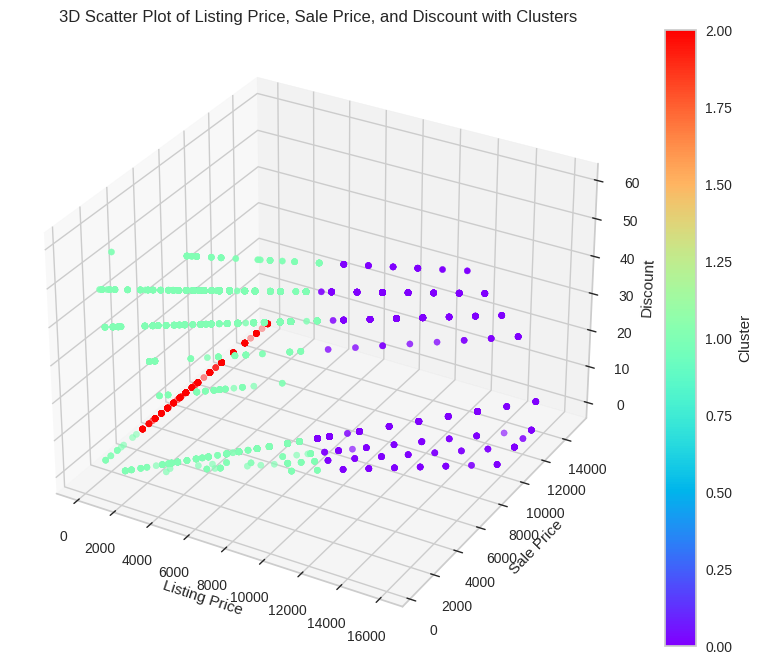

In [20]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data dengan 3 dimensi (Listing Price, Sale Price, Discount)
sc = ax.scatter(data_with_clusters['Listing Price'],
                data_with_clusters['Sale Price'],
                data_with_clusters['Discount'],
                c=data_with_clusters['Cluster'], cmap='rainbow')

ax.set_xlabel('Listing Price')
ax.set_ylabel('Sale Price')
ax.set_zlabel('Discount')

plt.title('3D Scatter Plot of Listing Price, Sale Price, and Discount with Clusters')
plt.colorbar(sc, label='Cluster')
plt.show()


**Reduksi Dimensi (PCA)**

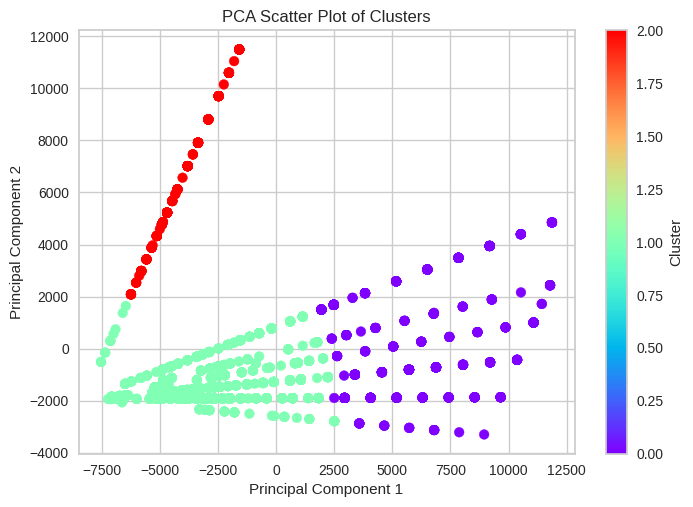

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Menggunakan PCA untuk mereduksi dimensi menjadi 2
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_with_clusters[['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']])

# Scatter plot 2D
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot of Clusters')
plt.colorbar(label='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type here

**1. ANALISIS KARAKTERISTIK TIAP CLUSTER**


**1. Cluster 0(Produk Premium):**

* Listing Price: Di atas 10,000 (contoh: 14,999).
* Sale Price: Tetap tinggi, meskipun diskon besar (contoh: 7,499).
* Discount: Konsisten sekitar 50%.
* Rating: Tinggi (contoh: 4.8).
* Reviews: Sedang hingga tinggi (contoh: 41).
* Brand: Dominasi Adidas Originals.

Cluster ini adalah kelompok produk premium dengan harga tinggi, rating sangat baik, dan diskon yang signifikan. Produk ini menarik bagi pelanggan yang menghargai kualitas tinggi dan merek terkenal.


**2. Cluster 1 (Produk Menengah):**

* Listing Price: Bervariasi di rentang menengah (contoh: 4,799 - 7,599).
* Sale Price: Lebih rendah, diskon antara 40%-50%.
* Discount: Stabil dan menarik.
* Rating: Bervariasi, antara 2.6 hingga 4.5.
* Reviews: Beragam, dari rendah hingga tinggi (contoh: 2 hingga 72).
* Brand: Mayoritas Adidas CORE/NEO.

Cluster ini mencerminkan produk dengan harga terjangkau bagi pasar menengah. Produk ini memiliki variasi dalam kualitas dan popularitas yang terlihat dari rating dan ulasan.


**Cluster 2 (Produk Terjangkau):**

* Listing Price: Rendah (contoh: 999 - 1,999).
* Sale Price: Sangat rendah setelah diskon (contoh: 599).
* Discount: Sekitar 40%.
* Rating: Rendah hingga sedang (contoh: 2.6 hingga 3.3).
* Reviews: Sangat sedikit (contoh: 2 hingga 7).
* Brand: Dominasi Adidas CORE/NEO.

****

**2. INTERPRETASI TIAP CLUSTER**

**1. Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis?**

Ya, hasil clustering ini logis dan sesuai dengan ekspektasi. Produk telah dikelompokkan berdasarkan harga, diskon, dan popularitas, menciptakan segmentasi yang sesuai dengan logika bisnis:
* Cluster 0: Produk premium untuk pelanggan kelas atas.
* Cluster 1: Produk menengah untuk pasar luas.
* Cluster 2: Produk murah untuk pelanggan dengan anggaran terbatas.

**2. Apakah ada pola tertentu yang bisa dimanfaatkan?**
* Cluster 0: Fokuskan pada promosi eksklusif, karena pelanggan cenderung menghargai kualitas tinggi dan diskon besar.
* Cluster 1: Gunakan strategi promosi berdasarkan kategori produk, seperti penawaran khusus untuk meningkatkan penjualan produk dengan ulasan rendah.
* Cluster 2: Perkuat promosi untuk meningkatkan visibilitas, karena produk ini berpotensi menarik pasar besar dengan anggaran terbatas.






# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [38]:
fixsdataset["cluster"] = identified_clusters

<ipython-input-38-1ac2c4d29513>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixsdataset["cluster"] = identified_clusters


In [44]:
fixsdataset[['Brand','cluster', 'Listing Price','Sale Price','Discount','Rating','Reviews','Brand_Encoded']].head(10)

,Brand,cluster,Listing Price,Sale Price,Discount,Rating,Reviews,Brand_Encoded
0,Adidas Adidas ORIGINALS,0,14999,7499,50,4.8,41,0
1,Adidas ORIGINALS,1,7599,3799,50,3.3,24,2
2,Adidas CORE / NEO,1,999,599,40,2.6,37,1
3,Adidas CORE / NEO,1,6999,3499,50,4.1,35,1
4,Adidas ORIGINALS,1,7999,3999,50,3.5,72,2
5,Adidas CORE / NEO,1,4799,1920,60,1.0,45,1
6,Adidas CORE / NEO,1,4799,2399,50,4.4,2,1
7,Adidas CORE / NEO,1,999,599,40,2.8,7,1
8,Adidas CORE / NEO,1,5599,2799,50,4.5,16,1
9,Adidas ORIGINALS,1,6599,3959,40,4.0,39,2


In [45]:
datasetnew = fixsdataset[['Brand','cluster', 'Listing Price','Sale Price','Discount','Rating','Reviews','Brand_Encoded']].head()

In [46]:
datasetnew.to_csv("datasetnewklasifikasi.csv", index = False)